In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import palettable as pal
%matplotlib inline


In [2]:
cd ~/quant


/home/ubuntu/quant


## Load in data table with salmon counts

In [12]:
count_df=pd.read_table('Combined-counts.tab', index_col='transcript')
count_df.head()


,SRR1976948,SRR1977249
transcript,,
PMFNBPKP_00001,44.3073,44.43960
PMFNBPKP_00002,12.7890,11.89990
PMFNBPKP_00003,13.8375,108.41100
PMFNBPKP_00004,25.0176,93.66800
PMFNBPKP_00005,19.3112,5.25834


## Histogram of data

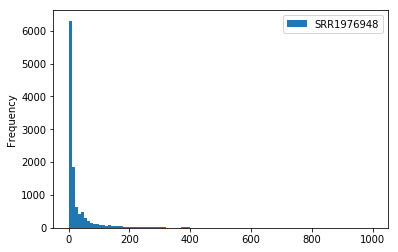

In [15]:
fig, ax = plt.subplots(1) #set up a figure and axis handle
count_df.plot(kind='hist', y='SRR1976948', ax=ax, 
              range=[0,1000], bins=100) #plot histogram


## Make Scatter Plot

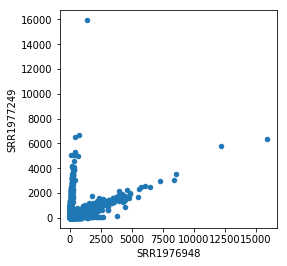

In [17]:
fig, ax = plt.subplots(1) #set up a figure and axis handle
ax.set_aspect('equal')
count_df.plot(kind='scatter', x='SRR1976948', y='SRR1977249', ax=ax) #plot scatter plot



## Read in the Prokka annotations

In [19]:
prokka_id=pd.read_table('metagG.tsv', index_col=0)
prokka_id.head(20)

,ftype,gene,EC_number,product
locus_tag,,,,
PMFNBPKP_00001,CDS,dhaT_1,1.1.1.202,"1,3-propanediol dehydrogenase"
PMFNBPKP_00002,CDS,NaN,NaN,hypothetical protein
PMFNBPKP_00003,CDS,proS_1,6.1.1.15,Proline--tRNA ligase
PMFNBPKP_00004,CDS,NaN,NaN,hypothetical protein
PMFNBPKP_00005,CDS,NaN,NaN,hypothetical protein
PMFNBPKP_00006,CDS,recD2_1,3.6.4.12,ATP-dependent RecD-like DNA helicase
PMFNBPKP_00007,CDS,trxB_1,1.8.1.9,Thioredoxin reductase
PMFNBPKP_00008,CDS,NaN,NaN,hypothetical protein
PMFNBPKP_00009,CDS,NaN,NaN,hypothetical protein


## Plot EC numbers of interest

In [6]:
ecNum='2.4.1.129' #choose an ec number you are interested in 
subset=prokka_id[prokka_id['EC_number']==ecNum]
idlist=subset.index
subset

,ftype,gene,EC_number,product
locus_tag,,,,
PMFNBPKP_00293,CDS,mrdB_1,2.4.1.129,Peptidoglycan glycosyltransferase MrdB
PMFNBPKP_01418,CDS,mrdB_2,2.4.1.129,Peptidoglycan glycosyltransferase MrdB
PMFNBPKP_02072,CDS,ftsW_1,2.4.1.129,putative peptidoglycan glycosyltransferase FtsW
PMFNBPKP_03256,CDS,ftsW_2,2.4.1.129,putative peptidoglycan glycosyltransferase FtsW
PMFNBPKP_06652,CDS,ftsW_3,2.4.1.129,putative peptidoglycan glycosyltransferase FtsW
PMFNBPKP_09111,CDS,mrdB_3,2.4.1.129,Peptidoglycan glycosyltransferase MrdB


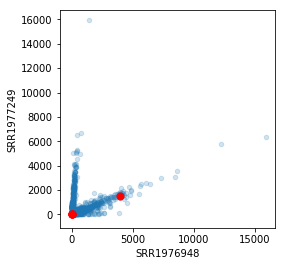

In [7]:
counts_sub=count_df.loc[idlist]
fig,ax=plt.subplots(1)
ax.set_aspect('equal')
count_df.plot(kind='scatter', x='SRR1976948', y='SRR1977249', 
              ax=ax, alpha=0.2, s=20) #plot scatter plot
counts_sub.plot(kind='scatter',x='SRR1976948', y='SRR1977249', 
                ax=ax, color='red', s=50)


## Group by EC number and then plot the mean and variance

In [23]:
# merge the prokka dataframe with the count data frame
counts_prokka=count_df.merge(prokka_id, left_index=True, right_index=True).dropna()
mean=counts_prokka.groupby('EC_number').mean().dropna()
std=counts_prokka.groupby('EC_number').std().dropna()




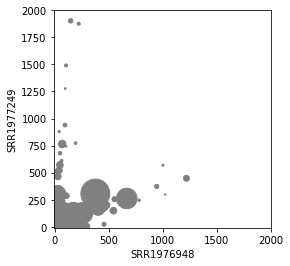

In [24]:
fig, ax = plt.subplots(1)
ax.set_aspect('equal')
ax.set_xlim(-10,2000)
ax.set_ylim(-10,2000)
mean.plot(kind='scatter',x='SRR1976948', y='SRR1977249',
          s=std, c='grey', ax=ax)

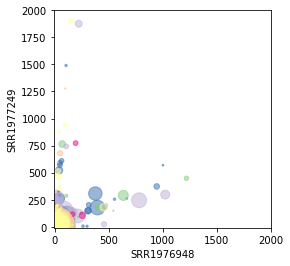

In [25]:
# Plot these data with colors

# Color the images by the first number of the EC Number
mean['EC_first']=mean.reset_index()['EC_number'].str[0]
test=mean.reset_index()['EC_number'].str[0]
test.index=mean.index
mean['EC_first']=test #list that we will color

# Set the color map 
EC_First=list(set(mean['EC_first']))
cdict={}
mycolors=pal.colorbrewer.qualitative.Accent_8.hex_colors
for i, ec in enumerate(EC_First):
    cdict[ec]=mycolors[i] 
    
mean.replace({'EC_first':cdict}, inplace=True) #replace with color map


# plot 
fig, ax = plt.subplots(1)
ax.set_aspect('equal')
ax.set_xlim(-10,2000)
ax.set_ylim(-10,2000)


for index, group in mean.groupby('EC_first'):
    group.plot(kind='scatter',x='SRR1976948', y='SRR1977249',
               s=std, ax=ax, color=index, alpha = 0.5)

